## Installs and imports

In [ ]:
!pip install requests beautifulsoup4 pandas pycountry geopy geopandas matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 64.0 MB/s eta 0:00:00


In [ ]:
import requests
import pandas as pd
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
import time
import matplotlib.pyplot as plt

## Get Meetup Data

In [ ]:
# Prepare data for DataFrame
extracted_data = []

for event in events:
    event_node = event['node']

    # Ensure 'venue' is not None before accessing its attributes
    venue = event_node.get('venue', {})

    extracted_data.append({
        'Event ID': event_node['id'],
        'Title': event_node['title'],
        'Description': event_node.get('description', ''),
        'Event URL': event_node.get('eventUrl', ''),
        'Date and Time': event_node.get('dateTime', ''),
        'End Time': event_node.get('endTime', ''),
        'Venue Name': venue.get('name', ''),  # Use 'venue' variable to safely access
        'Venue Address': venue.get('address', ''),
        'City': venue.get('city', ''),
        'Country': venue.get('country', ''),
        'Going Count': event_node.get('going', {}).get('totalCount', 0)
    })

# Convert to DataFrame
df = pd.DataFrame(extracted_data)

# Save to CSV
df.to_csv('meetup_similar_events.csv', index=False)
print("CSV file 'meetup_similar_events.csv' has been created successfully.")

# Display the DataFrame
print(df)


AttributeError: 'NoneType' object has no attribute 'get'

## Get all Community Builders

In [ ]:
import requests
import pandas as pd

# Example URL for community builders
base_url = 'https://aws.amazon.com/api/dirs/items/search?item.directoryId=community-builder&sort_by=item.additionalFields.cbName&sort_order={order}&size={size}&item.locale=en_US&q_operator=AND'

# Function to fetch the total number of items
def fetch_total_items():
    print("Fetching total number of community builders...")
    response = requests.get(base_url.format(order='asc', size=1))  # Fetch 1 item to get the total number of items
    if response.status_code == 200:
        data = response.json()
        total_items = data.get('metadata', {}).get('totalHits', 0)
        print(f"Total number of items available: {total_items}")
        return total_items
    else:
        print(f"Failed to retrieve data. Status code: {response.status_code}")
        return 0

# Function to fetch the community builders with pagination
def fetch_community_builders(size, order):
    print(f"Fetching community builders with size {size} in {order} order...")
    url = base_url.format(order=order, size=size)
    response = requests.get(url)

    if response.status_code == 200:
        data = response.json()
        print(f"Data received successfully, total items fetched: {len(data.get('items', []))}")
        return data.get('items', [])  # Return only the list of items
    else:
        print(f"Failed to retrieve data. Status code: {response.status_code}")
        return []

# Fetch total number of items
total_items = fetch_total_items()

# Fetch the first 2000 records
first_batch = fetch_community_builders(size=2000, order='asc')

# Fetch the remaining records
remaining_items = total_items - 2000
second_batch = fetch_community_builders(size=remaining_items, order='desc')

# Combine both batches (concatenate the lists)
all_items = first_batch + second_batch

# Add debug print to check if all_items is being populated correctly
print(f"Total items collected: {len(all_items)}")

# Check the structure of the data
if len(all_items) > 0:
    print(f"Sample item: {all_items[0]}")

# Convert the list of community builders into a pandas DataFrame
df = pd.DataFrame([{
    'Name': item.get('item', {}).get('additionalFields', {}).get('cbName', 'No name'),
    'Location': item.get('item', {}).get('additionalFields', {}).get('cbLocation', 'No location'),
    'Category': item.get('item', {}).get('additionalFields', {}).get('cbCategory', 'No category'),
    'Bio URL': item.get('item', {}).get('additionalFields', {}).get('cbBioURL', 'No URL')
} for item in all_items if 'item' in item and 'additionalFields' in item['item']])

# Save the DataFrame to a CSV
df.to_csv('community_builders_complete.csv', index=False)

# Print the DataFrame
print(f"Total records fetched: {len(df)}")
print(df.head())


Fetching total number of community builders...
Total number of items available: 2244
Fetching community builders with size 2000 in asc order...
Data received successfully, total items fetched: 2000
Fetching community builders with size 244 in desc order...
Data received successfully, total items fetched: 244
Total items collected: 2244
Sample item: {'item': {'id': 'community-builder#a-t-m-ruhul-amin', 'locale': 'en_US', 'directoryId': 'community-builder', 'name': 'a.t.m-ruhul-amin', 'dateCreated': '2023-10-31T22:32:19+0000', 'dateUpdated': '2023-10-31T22:50:42+0000', 'additionalFields': {'cbName': 'A.T.M Ruhul Amin', 'cbCategory': 'Front-End Web & Mobile Builder since 2023', 'cbBioURL': 'https://www.linkedin.com/in/atmruhulamin', 'cbLocation': 'Dhaka, Bangladesh'}}, 'tags': [{'id': 'community-builder#cb-type#mobile', 'locale': 'en_US', 'tagNamespaceId': 'community-builder#cb-type', 'name': 'mobile', 'description': '<p>mobile</p>\n', 'dateCreated': '2022-03-01T22:15:27+0000', 'dateUpdat

## Get Sessionize Data

In [ ]:
url = 'https://sessionize.com/api/v2/ew5mjcln/view/All'

response = requests.get(url)

if response.status_code == 200:
    data = response.json()
    print(data)

    # Convert the list to a DataFrame
    df = pd.DataFrame(data['sessions'])

    # Display the DataFrame
    print(df)

    # Save the DataFrame to a CSV file
    df.to_csv('sessionize-all-sessions.csv', index=False)
else:
    print(f"Failed to retrieve data. Status code: {response.status_code}")



{'sessions': [{'id': '666809', 'title': 'AI on AWS: optimising for cost and performance', 'description': 'AI-based applications are present in businesses of all types today. For this reason it is key to know perfectly the tools that AWS puts at our disposal to train and deploy models, and make inference. \r\n\r\nJoin this session if you want to learn about Capacity Blocks for ML, which allow you to reserve highly sought-after GPU instances on a future date to support your short duration machine learning (ML) workloads. You will also learn about AWS Trainium-based Amazon EC2 instances, AWS Inferentia and AWS Graviton, and how you can optimise your AI/ML workloads for cost and performance.', 'startsAt': None, 'endsAt': None, 'isServiceSession': False, 'isPlenumSession': False, 'speakers': ['9dd7d8c3-8bfb-4270-b97b-26e126461cc6'], 'categoryItems': [], 'questionAnswers': [], 'roomId': None, 'liveUrl': None, 'recordingUrl': None, 'status': 'Nominated', 'isInformed': False, 'isConfirmed': Fa

## Get APN Data

In [ ]:
import requests
import pandas as pd
import time

# Base API URL with pagination parameters
base_url = 'https://api.finder.partners.aws.a2z.com/search?locale=en&highlight=on&sourceFilter=searchPage&size={size}&from={from_value}'

# Function to fetch all partners with pagination and rate-limiting pauses
def fetch_all_partners(total_partners=8710, page_size=10, retries=3, delay=5, pause_after=60, pause_duration=30):
    all_partners = []
    from_value = 0
    request_count = 0

    print(f"Fetching all {total_partners} partners with pagination...")

    while from_value < total_partners:
        # Construct the paginated URL
        paginated_url = base_url.format(size=page_size, from_value=from_value)

        print(f"Fetching partners from {from_value} to {from_value + page_size}...")

        # Try to fetch the data with retries
        for attempt in range(retries):
            try:
                response = requests.get(paginated_url)

                if response.status_code == 200:
                    data = response.json()
                    partners = data.get('message', {}).get('results', [])

                    if not partners:
                        print("No more partners to fetch.")
                        break

                    # Append fetched partners to the list
                    all_partners.extend(partners)
                    print(f"Fetched {len(partners)} partners, total so far: {len(all_partners)}")

                    # Update the `from_value` for the next request
                    from_value += page_size
                    request_count += 1
                    break  # Break out of retry loop after successful request

                elif response.status_code == 310:
                    print(f"Status code {response.status_code}: Possible redirect or rate limit hit. Retrying...")
                    time.sleep(delay)  # Wait before retrying

                else:
                    print(f"Unexpected error. Status code: {response.status_code}. Retrying in {delay} seconds...")
                    time.sleep(delay)  # Wait before retrying

            except Exception as e:
                print(f"Error on attempt {attempt + 1}: {e}. Retrying in {delay} seconds...")
                time.sleep(delay)

        else:
            # If retries are exhausted, skip this batch and move to the next one
            print(f"Failed to fetch data from {from_value} to {from_value + page_size} after {retries} retries. Skipping...")
            from_value += page_size
            continue

        # Introduce a pause after a certain number of requests
        if request_count >= pause_after:
            print(f"Pausing for {pause_duration} seconds to avoid rate limits...")
            time.sleep(pause_duration)
            request_count = 0  # Reset request count after the pause

    print(f"Total partners fetched: {len(all_partners)}")
    return all_partners

# Fetch all partners with a pause every 60 requests (1 minute of fetching)
partners_data = fetch_all_partners()

# If data is fetched, process and save it to a DataFrame and CSV
if partners_data:
    # Extract relevant fields
    partner_data = []
    for partner in partners_data:
        partner_source = partner.get('_source', {})
        partner_data.append({
            'Partner Name': partner_source.get('literal_name', 'N/A'),
            'Partner ID': partner.get('_id', 'N/A'),
            'Description': partner_source.get('description', 'N/A'),
            'Website': partner_source.get('website', 'N/A'),
            'Certifications Count': partner_source.get('aws_certifications_count', 0),
            'Country': partner_source.get('office_address', [{}])[0].get('country', 'N/A'),
            'City': partner_source.get('office_address', [{}])[0].get('city', 'N/A')
        })

    # Convert to DataFrame
    df = pd.DataFrame(partner_data)

    # Save to CSV
    df.to_csv('aws_partners_complete.csv', index=False)

    # Print the DataFrame
    print(df)
else:
    print("No partners were fetched.")


Fetching all 8710 partners with pagination...
Fetching partners from 0 to 10...
Fetched 10 partners, total so far: 10
Fetching partners from 10 to 20...
Fetched 10 partners, total so far: 20
Fetching partners from 20 to 30...
Fetched 10 partners, total so far: 30
Fetching partners from 30 to 40...
Fetched 10 partners, total so far: 40
Fetching partners from 40 to 50...
Fetched 10 partners, total so far: 50
Fetching partners from 50 to 60...
Fetched 10 partners, total so far: 60
Fetching partners from 60 to 70...
Fetched 10 partners, total so far: 70
Fetching partners from 70 to 80...
Fetched 10 partners, total so far: 80
Fetching partners from 80 to 90...
Fetched 10 partners, total so far: 90
Fetching partners from 90 to 100...
Fetched 10 partners, total so far: 100
Fetching partners from 100 to 110...
Fetched 10 partners, total so far: 110
Fetching partners from 110 to 120...
Fetched 10 partners, total so far: 120
Fetching partners from 120 to 130...
Fetched 10 partners, total so far:

## Get User Groups Data

In [ ]:
# API endpoint URL with size set to 600 to fetch all items at once
url = 'https://aws.amazon.com/api/dirs/items/search?item.directoryId=community-user-groups&sort_by=item.additionalFields.ugName&sort_order=asc&size=600&item.locale=en_US'

# Send GET request
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    data = response.json()  # Parse the JSON response

    # Extract relevant fields into a list
    items = data.get('items', [])
    user_groups = []
    for item in items:
        ug_name = item['item']['additionalFields'].get('ugName', 'No name')
        ug_location = item['item']['additionalFields'].get('ugLocation', 'No location')
        ug_url = item['item']['additionalFields'].get('ugURL', 'No URL')
        ug_category = item['item']['additionalFields'].get('ugCategory', 'No category')
        user_groups.append({'Name': ug_name, 'Location': ug_location, 'URL': ug_url, 'Category': ug_category})

    # Convert the list to a DataFrame
    df = pd.DataFrame(user_groups)

    # Display the DataFrame
    print(df)

    # Save the DataFrame to a CSV file
    df.to_csv('aws_user_groups_complete.csv', index=False)

    print("Data saved to 'aws_user_groups_complete.csv'.")
else:
    print(f"Failed to retrieve data. Status code: {response.status_code}")


                                         Name  \
0                   AWS  User Group Timisoara   
1                      AWS Abidjan User Group   
2                                   AWS Accra   
3                                 AWS Algeria   
4                               AWS Amsterdam   
..                                        ...   
566                  Vancouver AWS User Group   
567  Vancouver Amazon Web Services User Group   
568             West Michigan AWS Users Group   
569           West Palm Beach - South Florida   
570                       York AWS User Group   

                                Location  \
0                     Timisoara, Romania   
1                   Abidjan, Ivory Coast   
2                           Accra, Ghana   
3                         Alger, Algeria   
4             Amsterdam, The Netherlands   
..                                   ...   
566                    Canada, Vancouver   
567  Vancouver, British Columbia, Canada   
568            

In [ ]:
# Load the dataset (replace with your file path)
df = pd.read_csv('aws_user_groups_complete.csv')

# Ensure the 'Location' column exists
if 'Location' in df.columns:
    # Extract country from the 'Location' column (assuming format "City, Country")
    df['Country'] = df['Location'].apply(lambda x: x.split(',')[-1].strip() if pd.notnull(x) else 'Unknown')

    # Check if the 'Country' column is created
    print(df[['Location', 'Country']].head())
else:
    print("The 'Location' column is missing in the dataset.")


                     Location          Country
0          Timisoara, Romania          Romania
1        Abidjan, Ivory Coast      Ivory Coast
2                Accra, Ghana            Ghana
3              Alger, Algeria          Algeria
4  Amsterdam, The Netherlands  The Netherlands


In [ ]:
# Load the CSV file
file_path = 'aws_user_groups_complete.csv'
df = pd.read_csv(file_path)

# Initialize geopy Nominatim geocoder with a user-agent
geolocator = Nominatim(user_agent="aws_user_groups")

# Function to geocode a location with retry logic and delay
def geocode_location(location):
    try:
        time.sleep(1)  # Delay to prevent hitting the rate limit (1 request per second)
        loc = geolocator.geocode(location, timeout=20)  # Increase timeout to 20 seconds
        if loc:
            return loc.latitude, loc.longitude
        else:
            return None, None
    except GeocoderTimedOut:
        return None, None

# Apply geocoding to each location
df['Latitude'], df['Longitude'] = zip(*df['Location'].apply(geocode_location))

# Drop rows where geocoding failed
df_cleaned = df.dropna(subset=['Latitude', 'Longitude'])

# Save the dataframe with the new Latitude and Longitude columns
df_cleaned.to_csv('aws_user_groups_with_coordinates.csv', index=False)

# Output the first few rows of the cleaned data
df_cleaned.head()


,Name,Location,URL,Category,Latitude,Longitude
0,AWS User Group Timisoara,"Timisoara, Romania",https://www.meetup.com/aws-timisoara,General AWS User Groups,45.753836,21.225747
1,AWS Abidjan User Group,"Abidjan, Ivory Coast",https://www.meetup.com/groupe-meetup-abidjan-a...,General AWS User Groups,5.320357,-4.016107
2,AWS Accra,"Accra, Ghana",https://www.meetup.com/aws-accra/,General AWS User Groups,5.557110,-0.201238
3,AWS Algeria,"Alger, Algeria",https://www.meetup.com/AWS-Algeria/,General AWS User Groups,36.772931,3.058829
4,AWS Amsterdam,"Amsterdam, The Netherlands",https://www.meetup.com/aws-ams/,General AWS User Groups,52.373080,4.892453


## Bar Chart of User Groups by Category

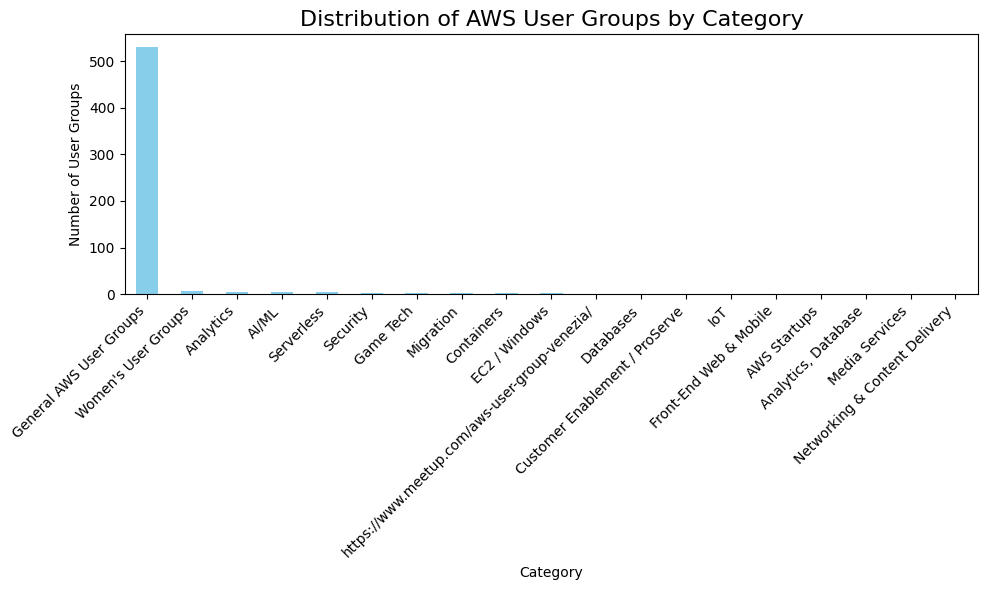

In [ ]:
# Load your dataframe (replace with your path)
df = pd.read_csv('aws_user_groups_complete.csv')

# Count the number of user groups by category
user_group_by_category = df['Category'].value_counts()

# Plot the distribution of user groups by category
plt.figure(figsize=(10, 6))
user_group_by_category.plot(kind='bar', color='skyblue')
plt.title('Distribution of AWS User Groups by Category', fontsize=16)
plt.xlabel('Category')
plt.ylabel('Number of User Groups')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## Pie Chart for User Groups by Country

## Horizontal Bar Chart for Top 10 Countries by Number of User Groups

In [ ]:
from google.colab import drive
import requests
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Updated base URL with correct parameters
base_url = 'https://aws.amazon.com/api/dirs/items/search?item.directoryId=community-heroes&sort_by=item.additionalFields.sortPosition&sort_order=asc&item.locale=en_US'

def fetch_community_builders(size, page=0):
    print(f"Fetching community builders page {page} with size {size}...")

    # Construct URL with pagination
    url = f"{base_url}&size={size}&page={page}"

    # Add headers to mimic browser request
    headers = {
        'User-Agent': 'Mozilla/5.0',
        'Accept': 'application/json'
    }

    response = requests.get(url)

    if response.status_code == 200:
        data = response.json()
        print(f"Data received successfully, items fetched: {len(data.get('items', []))}")
        return data.get('items', [])
    else:
        print(f"Failed to retrieve data. Status code: {response.status_code}")
        return []

# Fetch all records with pagination
all_items = []
page = 0
size = 100  # Fetch 100 items per request

while True:
    items = fetch_community_builders(size=size, page=page)
    if not items:  # If no items returned, we've reached the end
        break

    all_items.extend(items)
    print(f"Total items collected so far: {len(all_items)}")
    page += 1

# Convert to DataFrame
df = pd.DataFrame([{
    'Name': item.get('item', {}).get('additionalFields', {}).get('heroName', 'No name'),
    'Location': item.get('item', {}).get('additionalFields', {}).get('heroLocation', 'No location'),
    'Category': item.get('item', {}).get('additionalFields', {}).get('heroCategory', 'No category'),
    'Bio URL': item.get('item', {}).get('additionalFields', {}).get('heroBioURL', 'No URL'),
    'Since Date': item.get('item', {}).get('additionalFields', {}).get('heroSinceDate', 'No date'),
    'Description': item.get('item', {}).get('additionalFields', {}).get('description', 'No description'),
    'Image URL': item.get('item', {}).get('additionalFields', {}).get('heroImageURL', 'No image'),
    'Date Created': item.get('item', {}).get('dateCreated', 'No date'),
    'Date Updated': item.get('item', {}).get('dateUpdated', 'No date'),
    'Tags': '|'.join([tag.get('name', '') for tag in item.get('tags', [])])
} for item in all_items if 'item' in item])

# Save to Google Drive
save_path = '/content/drive/My Drive/data/aws_heroes_complete.csv'
df.to_csv(save_path, index=False)

print(f"Total records fetched: {len(df)}")
print(f"File saved to: {save_path}")
print("\nFirst few records:")
print(df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Fetching community builders page 0 with size 100...
Data received successfully, items fetched: 100
Total items collected so far: 100
Fetching community builders page 1 with size 100...
Data received successfully, items fetched: 100
Total items collected so far: 200
Fetching community builders page 2 with size 100...
Data received successfully, items fetched: 85
Total items collected so far: 285
Fetching community builders page 3 with size 100...
Data received successfully, items fetched: 0
Total records fetched: 285
File saved to: /content/drive/My Drive/data/aws_heroes_complete.csv

First few records:
                   Name                          Location  \
0  Ayyanar Jeyakrishnan                  Bengaluru, India   
1       Dzenana Dzevlan  Sarajevo, Bosnia and Herzegovina   
2        Kenneth Attard                   Valletta, Malta   
3     Marcin Sodk